<a href="https://colab.research.google.com/github/aaats781/pythonparaDataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [148]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [210]:
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')

tienda['Año'] = tienda['Fecha de Compra'].dt.year
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year



ventas_anuales_1 = tienda.groupby('Año')['Precio'].sum()
ventas_anuales_2 = tienda2.groupby('Año')['Precio'].sum()
ventas_anuales_3 = tienda3.groupby('Año')['Precio'].sum()
ventas_anuales_4 = tienda4.groupby('Año')['Precio'].sum()


df_ventas_anuales = pd.concat([
    ventas_anuales_1.rename('Tienda_1'),
    ventas_anuales_2.rename('Tienda_2'),
    ventas_anuales_3.rename('Tienda_3'),
    ventas_anuales_4.rename('Tienda_4')
], axis=1)


df_ventas_anuales_millones = df_ventas_anuales / 1_000_000
df_ventas_anuales_millones = df_ventas_anuales_millones.round(2)

df_ventas_anuales_millones








,Tienda_1,Tienda_2,Tienda_3,Tienda_4
Año,,,,
2020,368.93,320.47,321.71,330.85
2021,362.12,351.22,362.95,347.82
2022,316.57,358.23,350.44,302.22
2023,103.26,86.43,62.92,57.48


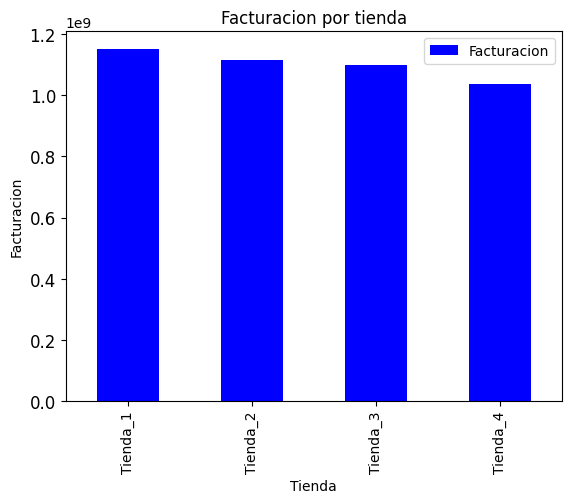

In [209]:
SumaTienda_1 = tienda['Precio'].sum()
SumaTienda_2 = tienda2['Precio'].sum()
SumaTienda_3 = tienda3['Precio'].sum()
SumaTienda_4 = tienda4['Precio'].sum()


df_plot = pd.DataFrame({'Tienda': ['Tienda_1','Tienda_2','Tienda_3','Tienda_4'],
                        'Facturacion': [SumaTienda_1,SumaTienda_2,SumaTienda_3,SumaTienda_4]})
df_plot.plot(x='Tienda', y='Facturacion', kind='bar', color='blue')
plt.title('Facturacion por tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturacion')
plt.yticks(fontsize=12)
plt.show()


# 2. Ventas por categoría

In [169]:
CantidadTienda_1 = tienda['Categoría del Producto'].value_counts()
CantidadTienda_2 = tienda2['Categoría del Producto'].value_counts()
CantidadTienda_3 = tienda3['Categoría del Producto'].value_counts()
CantidadTienda_4 = tienda4['Categoría del Producto'].value_counts()

SumaCategoriaTienda_1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
SumaCategoriaTienda_2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
SumaCategoriaTienda_3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
SumaCategoriaTienda_4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()


df_matriz = pd.concat([
    CantidadTienda_1.rename('Tienda_1'),
    SumaCategoriaTienda_1.rename('FactTienda_1'),
    CantidadTienda_2.rename('Tienda_2'),
    SumaCategoriaTienda_2.rename('FactTienda_2'),
    CantidadTienda_3.rename('Tienda_3'),
    SumaCategoriaTienda_3.rename('FactTienda_3'),
    CantidadTienda_4.rename('Tienda_4'),
    SumaCategoriaTienda_4.rename('FactTienda_4'),
     ], axis = 1)

df_matriz



,Tienda_1,FactTienda_1,Tienda_2,FactTienda_2,Tienda_3,FactTienda_3,Tienda_4,FactTienda_4
Categoría del Producto,,,,,,,,
Muebles,465,187633700.0,442,176426300.0,499,201072100.0,480,192528900.0
Electrónicos,448,429493500.0,422,410831100.0,451,410775800.0,451,409476100.0
Juguetes,324,17995700.0,313,15945400.0,315,19401100.0,338,20262200.0
Electrodomésticos,312,363685200.0,305,348567800.0,278,329237900.0,254,283260200.0
Deportes y diversión,284,39290000.0,275,34744500.0,277,35593100.0,277,33350100.0
Instrumentos musicales,182,91299000.0,224,104990300.0,177,77380900.0,170,75102400.0
Libros,173,8784900.0,197,10091200.0,185,9498700.0,187,9321300.0
Artículos para el hogar,171,12698400.0,181,14746900.0,177,15060000.0,201,15074500.0


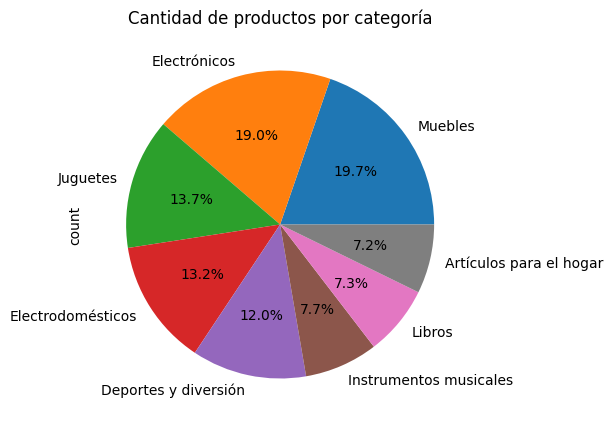

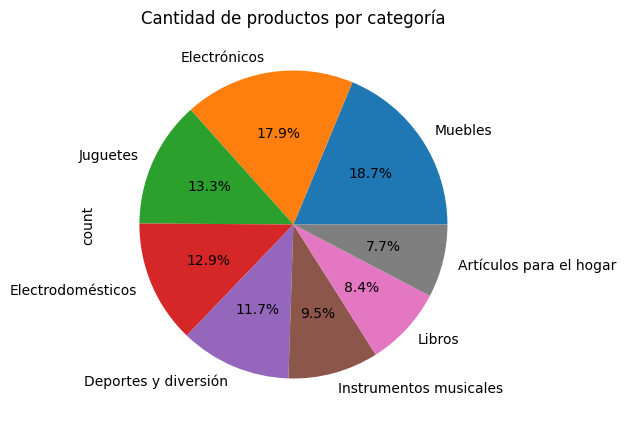

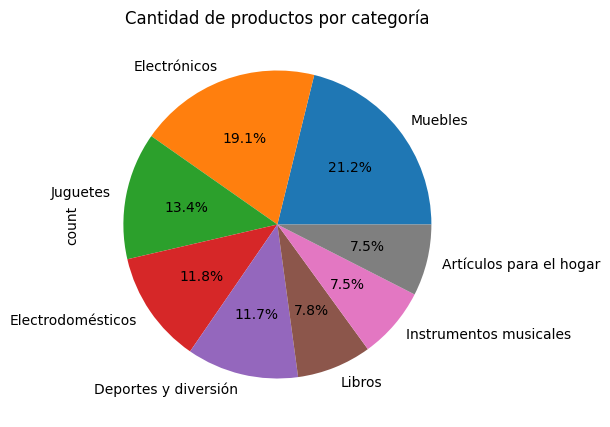

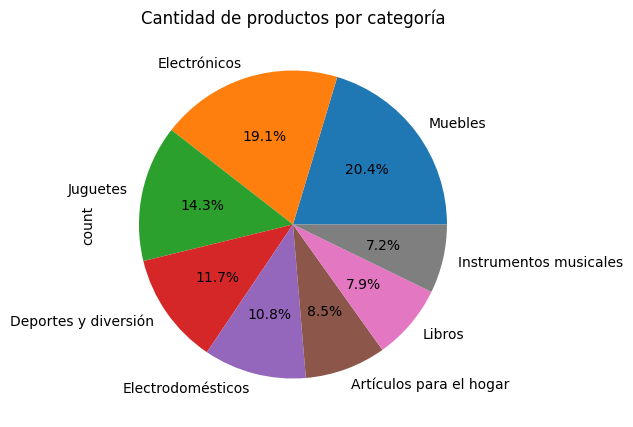

In [180]:

CantidadTienda_1.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='Cantidad de productos por categoría')
plt.show()
CantidadTienda_2.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='Cantidad de productos por categoría')
plt.show()
CantidadTienda_3.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='Cantidad de productos por categoría')
plt.show()
CantidadTienda_4.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='Cantidad de productos por categoría')
plt.show()



# 3. Calificación promedio de la tienda


In [190]:
CalificacionTienda_1 = tienda['Calificación'].mean()
CalificacionTienda_2 = tienda2['Calificación'].mean()
CalificacionTienda_3 = tienda3['Calificación'].mean()
CalificacionTienda_4 = tienda4['Calificación'].mean()


Califacion_Promedio = {'Tienda': ['Tienda_1','Tienda_2','Tienda_3','Tienda_4'],
                       'Calificacion Promedio': [CalificacionTienda_1,CalificacionTienda_2,CalificacionTienda_3,CalificacionTienda_4]
          }

df_Calificacion = pd.DataFrame(Califacion_Promedio)
df_Calificacion.columns = df_Calificacion.columns.str.strip().str.replace(' ', '_')

df_Calificacion


,Tienda,Calificacion_Promedio
0,Tienda_1,3.976685
1,Tienda_2,4.037304
2,Tienda_3,4.048326
3,Tienda_4,3.995759


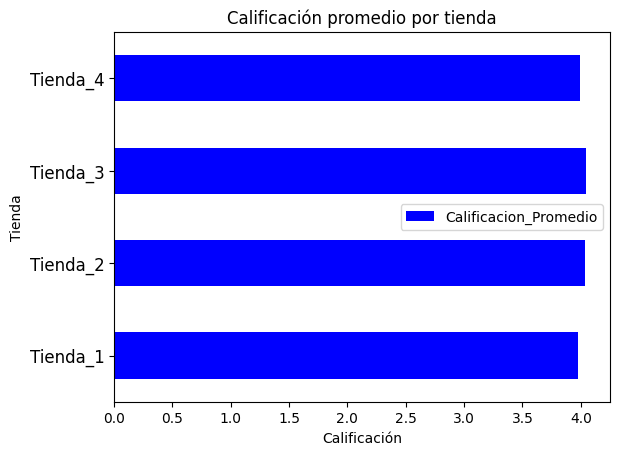

In [191]:
df_Calificacion.plot(x='Tienda', y='Calificacion_Promedio', kind='barh', color='blue')
plt.title('Calificación promedio por tienda')
plt.xlabel('Calificación')
plt.ylabel('Tienda')
plt.yticks(fontsize=12)
plt.show()

# 4. Productos más y menos vendidos

In [141]:
CantidadProductosTienda_1 = tienda['Producto'].value_counts()
CantidadProductosTienda_2 = tienda2['Producto'].value_counts()
CantidadProductosTienda_3 = tienda3['Producto'].value_counts()
CantidadProductosTienda_4 = tienda4['Producto'].value_counts()



df_matriz = pd.concat([
    CantidadProductosTienda_1.rename('Tienda_1'),
    CantidadProductosTienda_2.rename('Tienda_2'),
    CantidadProductosTienda_3.rename('Tienda_3'),
    CantidadProductosTienda_4.rename('Tienda_4'),
     ], axis = 1)

df_matriz



,Tienda_1,Tienda_2,Tienda_3,Tienda_4
Producto,,,,
Microondas,60,62,36,48
TV LED UHD 4K,60,45,42,40
Armario,60,54,49,34
Secadora de ropa,58,57,45,40
Mesa de noche,56,44,55,55
Bloques de construcción,56,54,35,54
Balón de baloncesto,55,42,50,50
Bicicleta,54,45,52,45
Vaso térmico,54,47,38,48


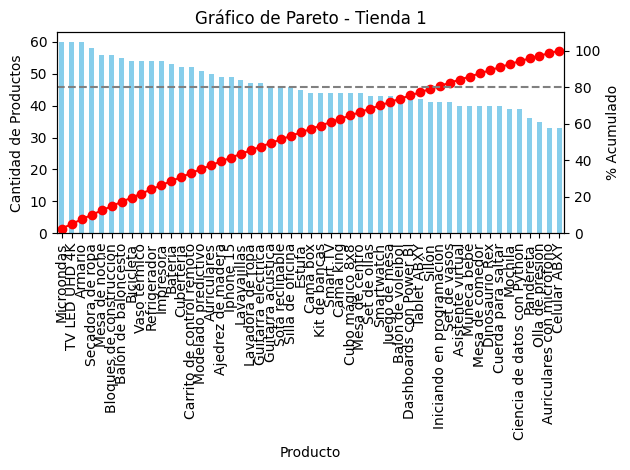

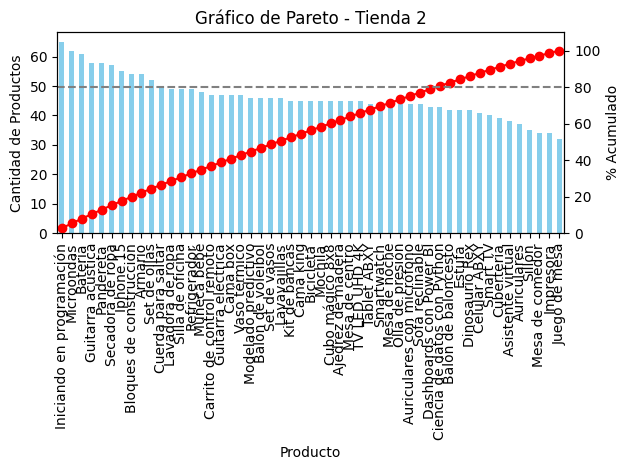

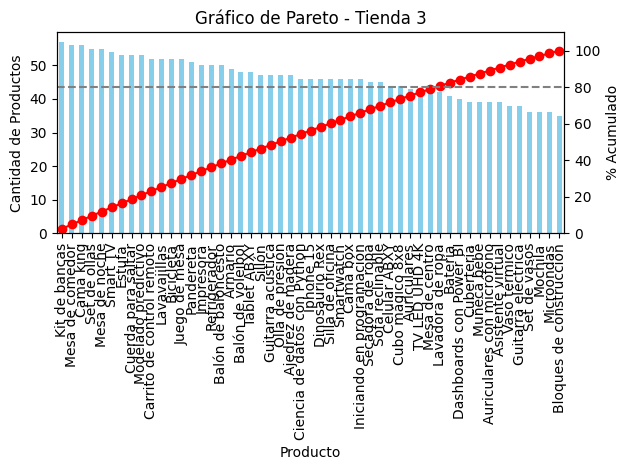

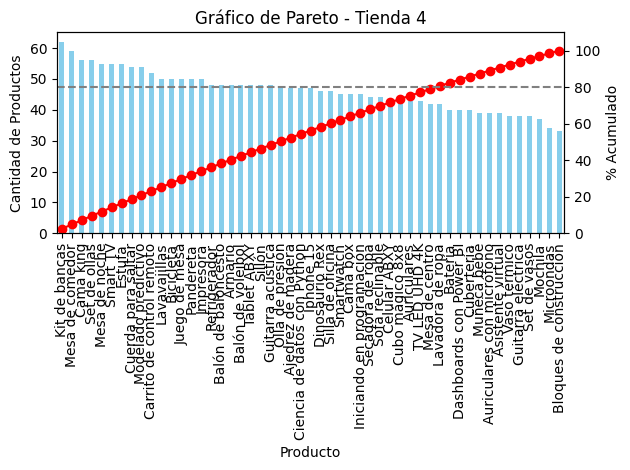

In [197]:
porcentaje_acumulado_tienda1 = CantidadProductosTienda_1.cumsum()/CantidadProductosTienda_1.sum() * 100
fig, ax1 = plt.subplots()
CantidadProductosTienda_1.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Cantidad de Productos')
ax1.set_title('Gráfico de Pareto - Tienda 1')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
porcentaje_acumulado_tienda1.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('% Acumulado')
ax2.axhline(80, color='gray', linestyle='dashed')  # línea del 80%
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()



porcentaje_acumulado_tienda2 = CantidadProductosTienda_2.cumsum()/CantidadProductosTienda_2.sum() * 100
fig, ax1 = plt.subplots()
CantidadProductosTienda_2.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Cantidad de Productos')
ax1.set_title('Gráfico de Pareto - Tienda 2')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
porcentaje_acumulado_tienda2.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('% Acumulado')
ax2.axhline(80, color='gray', linestyle='dashed')  # línea del 80%
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()




porcentaje_acumulado_tienda3 = CantidadProductosTienda_3.cumsum()/CantidadProductosTienda_3.sum() * 100
fig, ax1 = plt.subplots()
CantidadProductosTienda_3.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Cantidad de Productos')
ax1.set_title('Gráfico de Pareto - Tienda 3')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
porcentaje_acumulado_tienda3.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('% Acumulado')
ax2.axhline(80, color='gray', linestyle='dashed')  # línea del 80%
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()





porcentaje_acumulado_tienda4 = CantidadProductosTienda_4.cumsum()/CantidadProductosTienda_4.sum() * 100
fig, ax1 = plt.subplots()
CantidadProductosTienda_4.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Cantidad de Productos')
ax1.set_title('Gráfico de Pareto - Tienda 4')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
porcentaje_acumulado_tienda3.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('% Acumulado')
ax2.axhline(80, color='gray', linestyle='dashed')  # línea del 80%
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()







# 5. Envío promedio por tienda

In [199]:
Costo_Envio_PromedioTienda_1 = tienda['Costo de envío'].mean()
Costo_Envio_PromedioTienda_2 = tienda2['Costo de envío'].mean()
Costo_Envio_PromedioTienda_3 = tienda3['Costo de envío'].mean()
Costo_Envio_PromedioTienda_4 = tienda4['Costo de envío'].mean()


Costo_Promedio = {'Tienda': ['Tienda_1','Tienda_2','Tienda_3','Tienda_4'],
                       'Costo Promedio': [Costo_Envio_PromedioTienda_1,Costo_Envio_PromedioTienda_2,Costo_Envio_PromedioTienda_3,Costo_Envio_PromedioTienda_4]
          }

df_Cost_Prom = pd.DataFrame(Costo_Promedio)
df_Cost_Prom.columns = df_Cost_Prom.columns.str.strip().str.replace(' ', '_')
df_Cost_Prom

,Tienda,Costo_Promedio
0,Tienda_1,26018.609580
1,Tienda_2,25216.235693
2,Tienda_3,24805.680373
3,Tienda_4,23459.457167


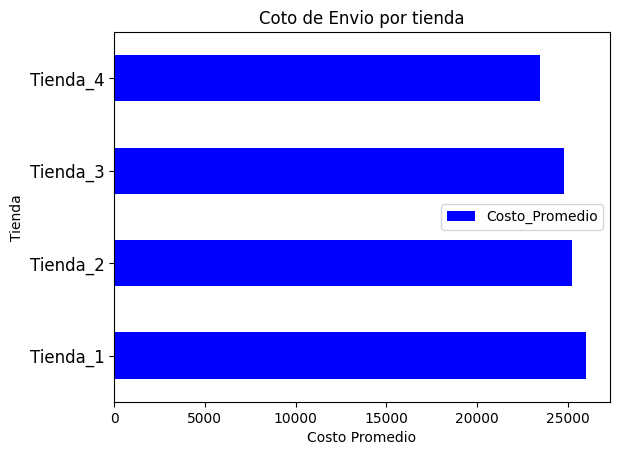

In [200]:
df_Cost_Prom.plot(x='Tienda', y='Costo_Promedio', kind='barh', color='blue')
plt.title('Coto de Envio por tienda')
plt.xlabel('Costo Promedio')
plt.ylabel('Tienda')
plt.yticks(fontsize=12)
plt.show()

# Informe Final Optimización rentabilidad de Tiendas
Se solicita la elaboración de un informe que incluya un análisis exhaustivo de los datos de ingresos y gastos correspondientes a cuatro tiendas ubicadas en diferentes regiones. El propósito de este análisis es determinar la rentabilidad individual de cada tienda, con el fin de identificar la menos rentable y evaluar su posible cierre o reubicación.

Para este fin, se proporcionan bases de datos en formato .csv, las cuales contienen la siguiente información estructurada en columnas:
#####    •	Producto
#####    •	Categoría del producto
#####    •	Precio
#####    •	Costo de envío
#####    •	Fecha de compra
#####    •	Vendedor
#####    •	Lugar de compra
#####    •	Calificación
#####    •	Método de pago
#####    •	Cantidad de cuotas
#####    •	Latitud
#####    •	Longitud



El objetivo principal es identificar cuál de las tiendas presenta el menor rendimiento financiero y emitir una recomendación final basada en los resultados obtenidos del análisis de los datos.

# Análisis de Datos
De acuerdo con los requerimientos del cliente, el análisis de los datos se estructurará en cinco apartados principales:
##### •	Ingresos totales por tienda: Se analizará el monto total generado por cada tienda a partir de la venta de sus productos.
##### •	Ventas por categorías: Se realizará una segmentación de los productos vendidos según las categorías definidas previamente por el cliente, con el fin de identificar cuáles concentran mayor volumen de ventas.
##### •	Valoración promedio por tienda: Se calculará la calificación media otorgada por los clientes, en función de la atención y experiencia recibida en cada punto de venta.
##### •	Productos más vendidos: Se identificará la distribución de productos con mayor cantidad de ventas en cada tienda.
##### •	Costo promedio de envío por tienda: Se determinará el valor medio que representa el envío de productos en cada tienda, como parte del análisis de los costos asociados a la operación.

# Ingresos totales
Se procede a analizar las ventas totales de cada tienda, entendidas como la suma del precio de todos los productos vendidos durante el período de tiempo proporcionado. No obstante, se desglosan también las ventas por año con el fin de identificar posibles variaciones atípicas o factores particulares que hayan afectado un periodo específico. Además, los resultados se presentan en millones para facilitar su lectura e interpretación.

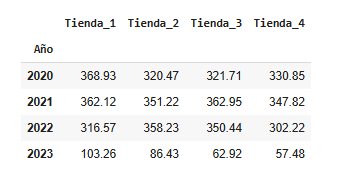

Se observa que, en general, las ventas anuales mantienen un comportamiento consistente a lo largo del tiempo, con la excepción del año 2023. Esta variación podría deberse a que el año aún no había finalizado al momento de la extracción de los datos.

En el gráfico acumulado, se destaca que la Tienda 1 presenta el mayor volumen de ventas, mientras que la Tienda 4 muestra el menor desempeño, con una diferencia significativa de aproximadamente $112,5 millones (USD) entre ambas. Este patrón de comportamiento se mantiene de forma constante a lo largo de los años analizados.

 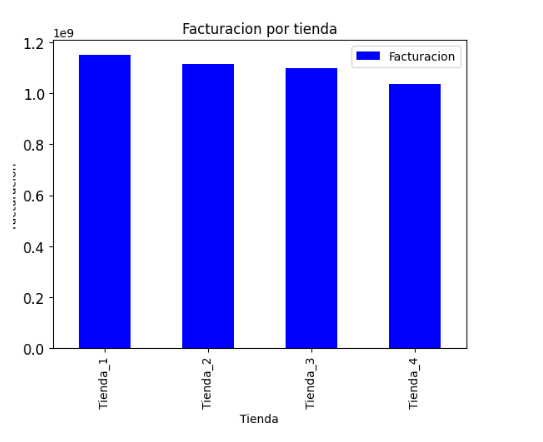

# Ventas por categoría
Se analiza el detalle de las ventas por categoría en cada tienda, considerando tanto el monto total como la cantidad de productos vendidos. A partir de este análisis, se determina que aproximadamente el 50% de las ventas se concentran en tres categorías principales:

##### •	Muebles
##### •	Electrónicos
##### •	Juguetes

Este comportamiento se refleja claramente en el cuadro adjunto, lo que sugiere que estas categorías representan los principales motores de ingreso para las tiendas.

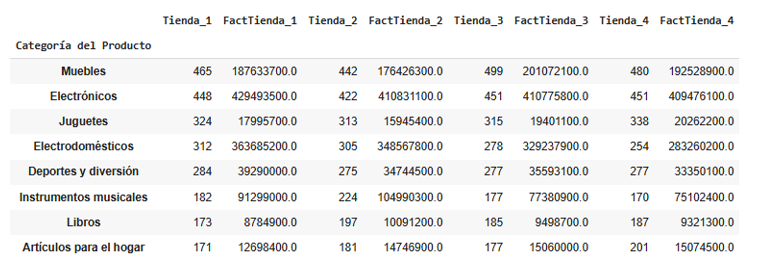

Adicional a ello se adjunta gráficos de pastel para validar si existe un comportamiento diferente en las tiendas.

 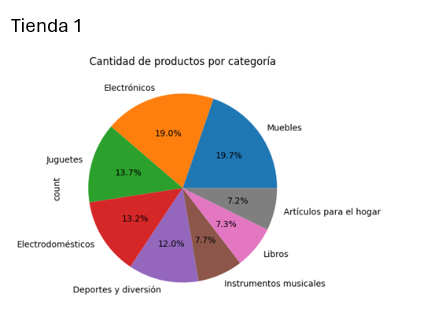


 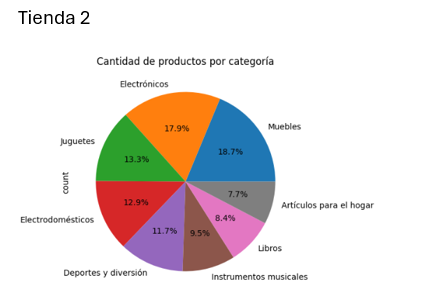


 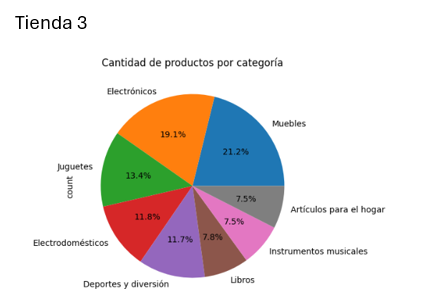

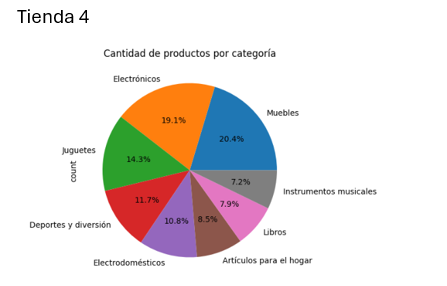

Proporcionalmente se venden cantidad similares en cada tienda.

# Valoración media por tienda
La calificación promedio por tienda funciona como un indicador del nivel de servicio y satisfacción del cliente. En este análisis, se observa que las diferencias entre tiendas son mínimas, con variaciones inferiores a 0.053 puntos respecto a la calificación más alta.
A pesar de esta cercanía en los promedios, la Tienda 4 presenta la valoración más baja, lo cual podría ser un factor a considerar en conjunto con otras métricas de desempeño.

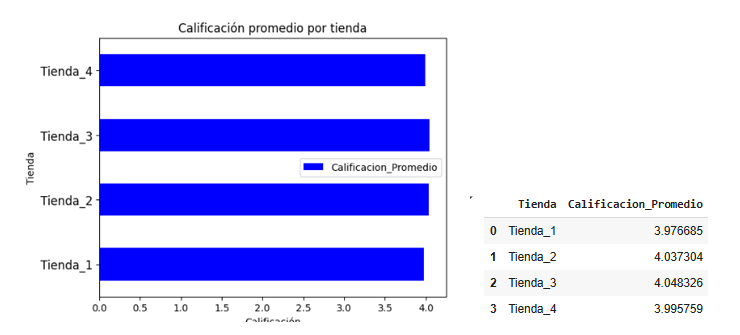

# Productos más vendidos
Al igual que en el análisis por categoría, este apartado busca identificar si existe una mayor afluencia o preferencia por determinados productos en cada tienda. Para ello, se utilizó un gráfico de Pareto que permite visualizar la concentración de las ventas.

Sin embargo, los resultados muestran una distribución bastante homogénea entre los productos, sin una concentración significativa en un solo ítem. Aun así, destacan línea blanca y televisores como los productos con mayor preferencia por parte de los clientes.

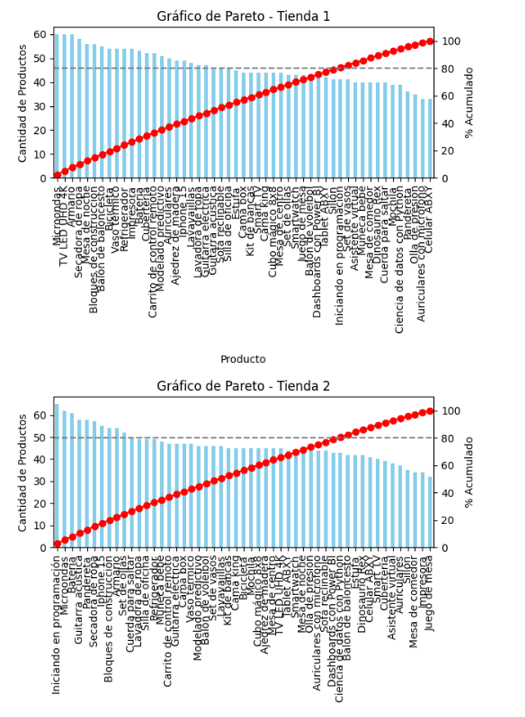


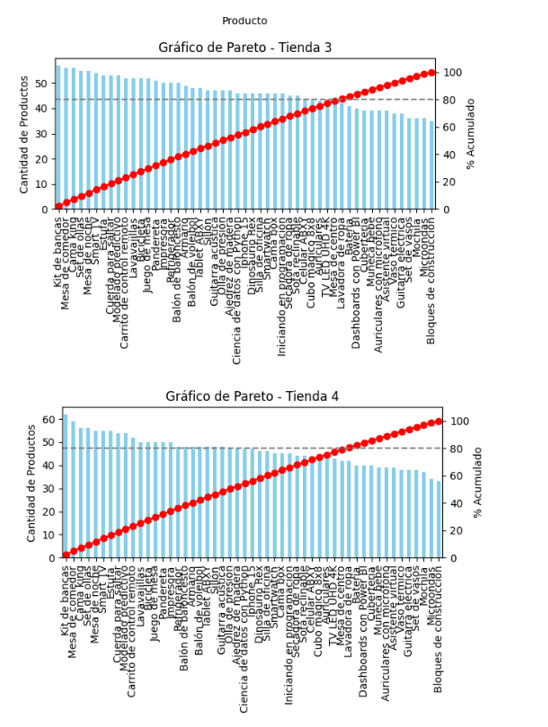

# Valor del envió promedio por tienda
El costo de envío es, sin duda, un factor clave en la rentabilidad de las tiendas, ya que está directamente relacionado con los costos variables de cada venta. Si este no se gestiona adecuadamente, podría incluso superar los ingresos generados y afectar negativamente la rentabilidad, aun cuando el volumen de ventas sea alto.

No obstante, en este análisis se observa que el gasto en envíos mantiene una correlación directa con los ingresos: a mayor nivel de ventas, mayor es el gasto en envíos, y viceversa. Esto se refleja claramente tanto en los datos como en el gráfico adjunto, lo que indica un comportamiento proporcional entre ingresos y costos de envío.

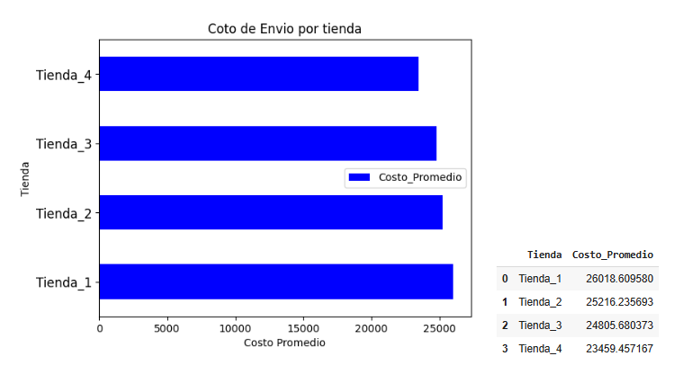


# Recomendación
Tomando en cuenta los datos analizados, no se evidencian diferencias significativas entre las tiendas en cuanto a los productos vendidos, ya que la distribución es similar en todas.

Sin embargo, al observar las ventas totales, la Tienda 4 presenta el menor volumen de ingresos. Además, aunque los costos de envío son proporcionales al nivel de ventas en todas las tiendas, esta ubicación también muestra la calificación promedio más baja por parte de los clientes.

Con base en estos tres indicadores —menor volumen de ventas, menor valoración del servicio, y costos similares a tiendas más rentables— se recomienda evaluar el traslado o cierre de la Tienda 4, con el objetivo de optimizar recursos y mejorar la rentabilidad general.





